In [20]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from codigos import extract_features, cross_validation, grid_search, preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
path = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo2"

## Vggnet16

In [5]:
x_train_vggnet, y_train_vggnet, x_test_vggnet, y_test_vggnet = extract_features.features_vgg16(path)

******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16
******************************************************************** 
Labels: ['glaucoma' 'normal']
Labels encoded: [0 1]
9/9 [==============================] - 29s 3s/step
******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16 finalizada
******************************************************************** 


In [14]:
models_cv = cross_validation.compare_models(x_train_vggnet, y_train_vggnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [15]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.732143,0.753001,0.745238,0.738025,0.833532
1,Naive Bayes,0.901488,0.838262,0.995833,0.910142,0.901722,0.702381,0.691606,0.771429,0.723528,0.702183
2,SVM,0.715179,0.690141,0.791071,0.733016,0.837782,0.665476,0.669625,0.764286,0.697991,0.791383
3,LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.753430,0.778571,0.759283,0.847789
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.740476,0.748044,0.761905,0.747357,0.847676


## Resnet 

In [8]:
x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet = extract_features.features_resnet(path)

******************************************************************** 
Extracción de caracteristicas por medio de RESNET
******************************************************************** 
Labels: ['glaucoma' 'normal']
Labels encoded: [0 1]
******************************************************************** 
Extracción de caracteristicas por medio de RESNET finalizada
******************************************************************** 


In [16]:
models_cv = cross_validation.compare_models(x_train_resnet, y_train_resnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [17]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.0000,1.000000,1.000000,0.748810,0.750291,0.761905,0.751939,0.824461
1,Naive Bayes,0.736607,0.711221,0.8000,0.752707,0.775588,0.688095,0.673385,0.761905,0.709086,0.711891
2,SVM,0.861012,0.860087,0.8625,0.861181,0.933216,0.744048,0.744857,0.766667,0.750200,0.836565
3,LGBM,1.000000,1.000000,1.0000,1.000000,1.000000,0.748810,0.744188,0.773810,0.755560,0.851474
4,XGBoost,1.000000,1.000000,1.0000,1.000000,1.000000,0.746429,0.747306,0.761905,0.750594,0.854734


In [22]:
muestras_en_intervalo = 50
n_iter = 100

learning_ra_0 = list(set([float(x) for x in np.linspace(start = 0.001, stop = 0.8, num = muestras_en_intervalo)]))
estimadores_0 = list(set([int(x) for x in np.linspace(start = 10, stop = 200, num = muestras_en_intervalo)]))
profundidad_0 = list(set([int(x) for x in np.linspace(start = 11,  stop = 50, num = muestras_en_intervalo)]))
min_data_le_0 = list(set([int(x) for x in np.linspace(start = 18,  stop = 0.5*x_train_resnet.shape[0], num = muestras_en_intervalo)]))

parametros = {'learning_ra': learning_ra_0,
              'estimadores': estimadores_0,
              'profundidad': profundidad_0,
              'min_data_le': min_data_le_0
             }

In [23]:
ronda_0 = grid_search.train_models(x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet, n_iter, parametros)

******************************************************************** 
Iniciando busqueda de hiperparametros
******************************************************************** 
******************************************************************** 
Iteración: 0
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=132, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=132
[LightGBM] [Warning] min_data_in_leaf is set=272, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=272
[LightGBM] [Warning] min_data_in_leaf is set=346, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=346
[LightGBM] [Warning] min_data_in_leaf is set=370, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=370
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=272, m

[LightGBM] [Warning] min_data_in_leaf is set=255, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=255
[LightGBM] [Warning] min_data_in_leaf is set=420, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=420
******************************************************************** 
Iteración: 60
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] min_data_in_leaf is set=321, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=321
[LightGBM] [Warning] min_data_in_leaf is set=182, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=182
[LightGBM] [Warning] min_data_in_leaf is set=132, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=132
[LightGBM] [Warning] min_data_in_leaf is set=190, min_child_samples=20 will be ignored. Current value:

In [24]:
ronda_0.to_excel("Modelo2/ronda_0.xlsx")

In [29]:
data = pd.read_excel("Modelo2/ronda_0.xlsx")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

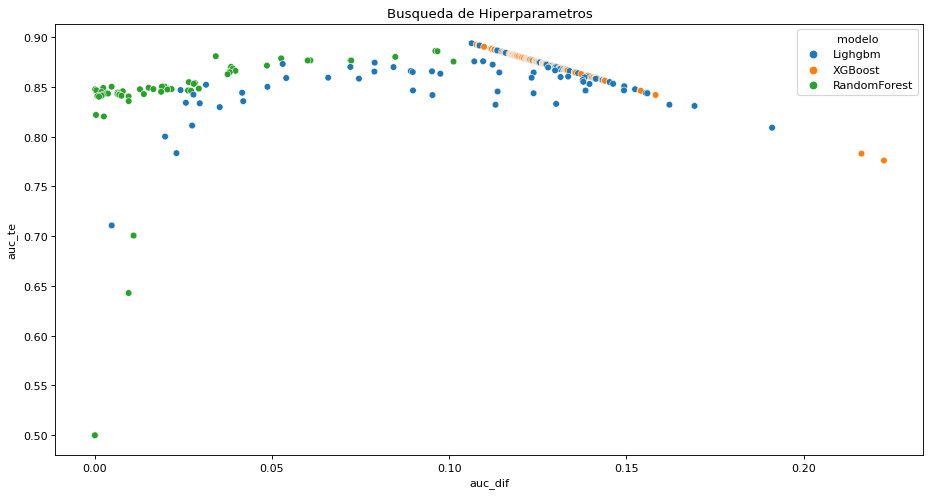

In [30]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data, x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

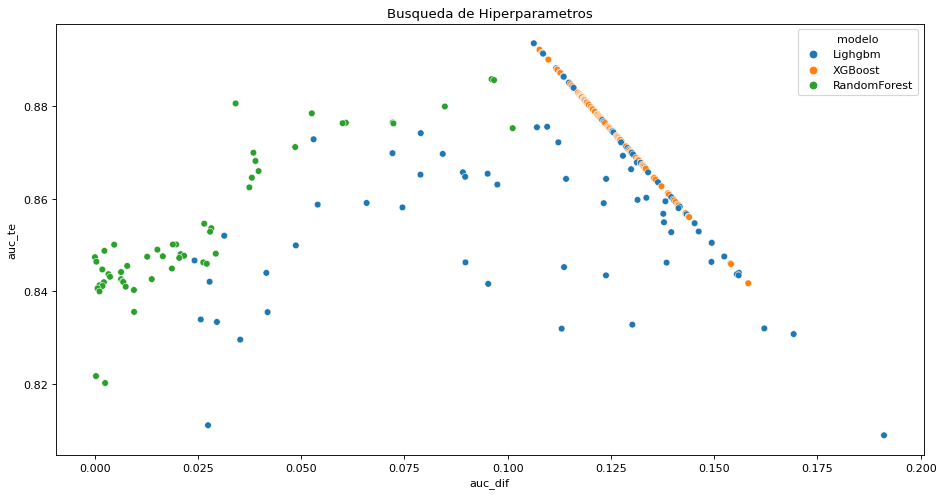

In [33]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data[data["auc_te"]>=0.8], x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

In [36]:
muestras_en_intervalo = 50
n_iter = 100

learning_ra_0 = list(set([float(x) for x in np.linspace(start = 0.001, stop = 0.8, num = muestras_en_intervalo)]))
estimadores_0 = list(set([int(x) for x in np.linspace(start = 33, stop = 122, num = muestras_en_intervalo)]))
profundidad_0 = list(set([int(x) for x in np.linspace(start = 15,  stop = 45, num = muestras_en_intervalo)]))
min_data_le_0 = list(set([int(x) for x in np.linspace(start = 50,  stop = 75, num = muestras_en_intervalo)]))

parametros = {'learning_ra': learning_ra_0,
              'estimadores': estimadores_0,
              'profundidad': profundidad_0,
              'min_data_le': min_data_le_0
             }

In [37]:
ronda_1 = grid_search.train_models(x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet, n_iter, parametros)

******************************************************************** 
Iniciando busqueda de hiperparametros
******************************************************************** 
******************************************************************** 
Iteración: 0
******************************************************************** 
******************************************************************** 
Iteración: 10
******************************************************************** 
******************************************************************** 
Iteración: 20
******************************************************************** 
******************************************************************** 
Iteración: 30
******************************************************************** 
******************************************************************** 
Iteración: 40
******************************************************************** 
*****************************************************

In [39]:
ronda_1.to_excel("Modelo2/ronda_1.xlsx")

In [41]:
data = pd.read_excel("Modelo2/ronda_1.xlsx")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

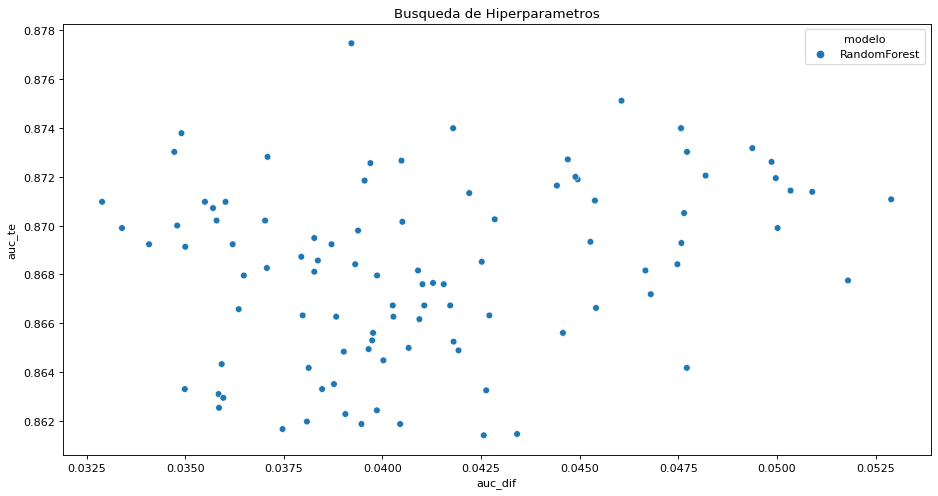

In [42]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data, x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")